In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import sys
today = str(datetime.datetime.now().date())
print(today)
%matplotlib inline

2017-10-23


In [2]:
#https://finance.google.com/finance/getprices?q=HM-B&p=10d&f=d,o,h,l,c,v
#http://finance.google.com/finance/getprices?q=OMXS30&x=INDEXNASDAQ&p=2Y&i=86400&f=d,o,h,l,c,v

CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
ROOT =  os.path.join(CURR_PATH)
sys.path.append(os.path.join(ROOT,'modules'))

import stocks as stocks
import style as style
style.set_style()

Style set


In [6]:
# OMXS30 Data
# ['ALIV-SDB','NCC-B','LUMI-SDB','THULE','HM-B','VOLV-B','BOL','GETI-B','SKA-B','AZN']
#Quotes = ['OMXS30']
#exchange = 'INDEXNASDAQ'
exchange = 'STO'
Quotes = ['VOLV-B','HM-B','SKA-B']
period_length = 5
period = 'Y'
interval_min = 60*24
interval_sec = 60*interval_min
df, url_string = stocks.GoogleIntradayQuote(Quotes,interval_sec,period_length,period,exchange)
print(df.head())
from_date = str(df['datetime'].min().date())
to_date = str(df['datetime'].max().date())
days = np.busday_count(from_date,to_date)+1
print('ticks:',df.shape[0])
print('from:', from_date)
print('to:', to_date)
print('days:', days)

http://finance.google.com/finance/getprices?q=VOLV-B&x=STO&p=5Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=HM-B&x=STO&p=5Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=SKA-B&x=STO&p=5Y&i=86400&f=d,o,h,l,c,v
             datetime   stock   open   high    low  close      volume
0 2012-10-23 17:30:00  VOLV-B  92.35  92.50  89.55  90.20   8108286.0
1 2012-10-24 17:30:00  VOLV-B  83.00  89.45  82.55  88.50  29301821.0
2 2012-10-25 17:30:00  VOLV-B  87.40  88.10  86.90  87.05   8349854.0
3 2012-10-26 17:30:00  VOLV-B  86.40  88.20  86.20  87.90   5616404.0
4 2012-10-29 17:30:00  VOLV-B  87.25  87.80  86.80  87.50   3631650.0
ticks: 3737
from: 2012-10-23
to: 2017-10-20
days: 1304


In [8]:
exchange = 'STO'
Quotes = ['VOLV-B','HM-B','SKA-B']
period_length = 1
period = 'd'
interval_min = 2
interval_sec = 60*interval_min
df, url_string = stocks.GoogleIntradayQuote(Quotes,interval_sec,period_length,period,exchange)

http://finance.google.com/finance/getprices?q=VOLV-B&x=STO&p=1d&i=120&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=HM-B&x=STO&p=1d&i=120&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=SKA-B&x=STO&p=1d&i=120&f=d,o,h,l,c,v


In [10]:
df['datetime'].min()

Timestamp('2017-10-23 09:02:00')

In [4]:
filename = 'quote='
for Quote in Quotes:
    filename = filename+Quote
filename = filename+'&start='+from_date+'&end='+to_date+'&interval='+str(interval_min)+'min'
print(filename)
df.to_pickle(os.path.join('data',filename+'.pkl'))

quote=VOLV-BHM-BSKA-B&start=2012-10-23&end=2017-10-20&interval=1440min


,datetime,open,high,low,close,volume
stock,,,,,,
HM-B,7569,7569,7569,7569,7569,7569
VOLV-B,7313,7313,7313,7313,7313,7313


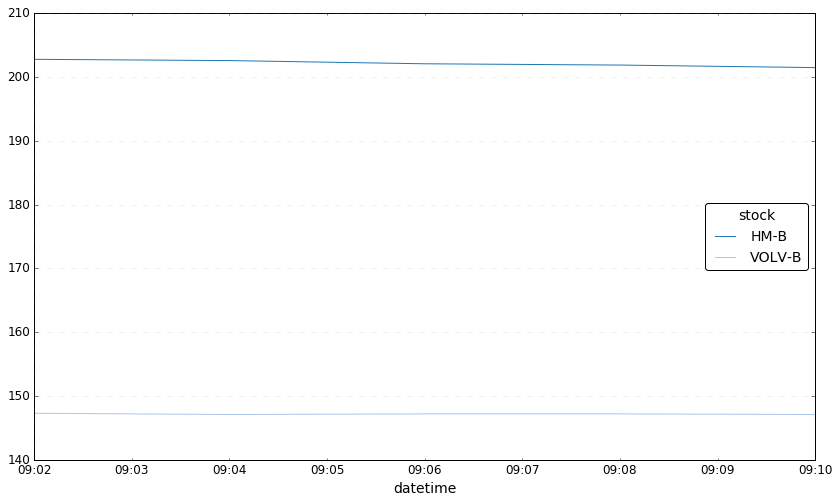

In [7]:
df[['datetime','stock','close']].groupby(['datetime','stock'])['close'].sum().unstack().head().plot(grid = True)
df.groupby('stock').count()